In [3]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
TRAIN_DIR = '/Users/mac_osx/Desktop/train'
TEST_DIR =  '/Users/mac_osx/Desktop/test'
IMG_SIZE = 70
LR = 1e-5
MODEL_NAME = 'dogvscat-{}-{}.model'.format(LR,'6conv-basic')

In [4]:
def lbl_img(img):
    world_lbl = img.split('.')[-3]
    if world_lbl == 'cat':
        return[1,0]
    elif world_lbl == 'dog':
        return[0,1]

In [5]:
def create_train_data():
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        lbl = lbl_img(img)
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        training_data.append([np.array(img),np.array(lbl)])
        shuffle(training_data)
        np.save('train_data.np',training_data)
    
    return training_data

In [6]:
def process_test():
    testing_data = []
    for img in tqdm(os.listdir(TEST_DIR)):
        lbl_num = img.split('.')[0]
        path = os.path.join(TEST_DIR,img)
        img = cv2.resize(cv2.imread(path,cv2.IMREAD_GRAYSCALE),(IMG_SIZE,IMG_SIZE))
        testing_data.append([np.array(img),lbl_num])
       
    np.save('test_data.np',testing_data)
    return testing_data

In [7]:
train_data = create_train_data()
#train_data = np.load('train_data.np')

100%|██████████| 25000/25000 [7:09:26<00:00,  1.03s/it]  


In [21]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression


import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [22]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!!')

In [23]:
train=train_data[:-500]
test=train_data[-500:]

In [24]:
X = np.array([i[0] for i in train ]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test ]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]


In [25]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1914  | total loss: 0.59840 | time: 94.592s
| Adam | epoch: 005 | loss: 0.59840 - acc: 0.6851 -- iter: 24448/24500
Training Step: 1915  | total loss: 0.60068 | time: 95.913s
| Adam | epoch: 005 | loss: 0.60068 - acc: 0.6837 | val_loss: 0.62338 - val_acc: 0.6620 -- iter: 24500/24500
--


100%|██████████| 12500/12500 [00:11<00:00, 1085.68it/s]


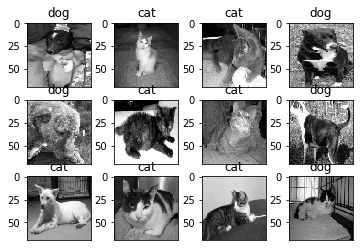

In [26]:
import matplotlib.pyplot as plt
test_data = process_test()

fig = plt.figure()

for num,data in enumerate(test_data[:12]):
    lbl_num = data[1]
    lbl_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = lbl_data
    data = lbl_data.reshape(IMG_SIZE,IMG_SIZE,1)
    
    model_out = model.predict([data])[0]
    if np.argmax(model_out) ==1 : str_label = 'dog'
    else:str_label = 'cat'
    
    y.imshow(orig,cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_xaxis().set_visible(False)
    
plt.show()
    

In [14]:
import tensorflow as tf
tf.reset_default_graph()

In [27]:
with open('submission_file.csv','w') as f:
    f.write('id,label\n')

In [28]:
model.save(MODEL_NAME)


INFO:tensorflow:/Users/mac_osx/dogvscat-1e-05-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


In [29]:
with open('submission_file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num,model_out[1]))

100%|██████████| 12500/12500 [00:33<00:00, 378.06it/s]


In [1]:
ls

AnacondaProjects/
AndroidStudioProjects/
Applications/
Creative Cloud Files/
Desktop/
Documents/
Downloads/
Library/
MNIST_data/
Movies/
Music/
Pictures/
Public/
PycharmProjects/
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
VirtualBox VMs/
anaconda/
book.txt
catvsdog.ipynb
checkpoint
dogvscat-0.001-6conv-basic.model.data-00000-of-00001
dogvscat-0.001-6conv-basic.model.index
dogvscat-0.001-6conv-basic.model.meta
dogvscat-1e-05-6conv-basic.model.data-00000-of-00001
dogvscat-1e-05-6conv-basic.model.index
dogvscat-1e-05-6conv-basic.model.meta
eclipse/
initial123.py
log/
neo4j-enterprise-3.1.0/
nltk_data/
src/
submission_file.csv
test_data.np.npy
tf2.py
train_data.np.npy
